## ml exercise 02

In [129]:
# import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
# initialize titanic dataframe
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In this exercise, you'll be working with a dataset containing information about passengers on the Titanic. You can get more information about this dataset here. Our goal will be to build a model to predict whether a passenger survived the voyage.

Let's start by building a model using Age as a predictor variable.

When performing a train/test split, you usually want to make sure that the ratios of target values look the same in the training set and in the test set. This is especially true with imbalanced targets, where there are more observations in one class than the other. This can be done by, instead of a completely random split, by performing a stratified split.

1. Create a DataFrame, X, which contains one column, Age, and a Series, y, which contains the target variable. Perform a 70/30 train/test split, stratifying by the target variable. Make sure that you set a random_state during this split.

In [131]:
from sklearn.model_selection import train_test_split

# specify target and predictor(s)
predictors = ['Age']
target = 'Survived'

X = titanic[predictors]
y = titanic[target]

# train, test, split titanic data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

2. Now, try and fit a logistic regression model using the LogisticRegression class. When you do this, you're likely to encounter an error, that "Input X contains NaN." If you check, you'll find that there are some missing values in the Age column. In the next step, we'll address this issue.

In [132]:
from sklearn.linear_model import LogisticRegression

"""
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
"""

'\nlogreg = LogisticRegression()\nlogreg.fit(X_train, y_train)\n'

One option when a column contains missing values is to impute them, meaning to replace the missing values with an estimate. A simple way to impute is to fill missing values using the mean value. Important Note: When imputing with the mean, you should calculate the mean value only on the training data. In order to have an unbiased estimate of model performance, it is important that the model has access to no information about the test set.

3. Using a SimpleImputer, fit the training data and then use it to transform both the training and test data.

In [133]:
from sklearn.impute import SimpleImputer

# initialize imputer using mean values as fill values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# print training data (to see average values where NANs existed previously)
print(X_test)

[[61.        ]
 [19.        ]
 [30.04547619]
 [27.        ]
 [45.        ]
 [70.        ]
 [30.04547619]
 [23.        ]
 [30.        ]
 [19.        ]
 [30.04547619]
 [16.        ]
 [30.04547619]
 [62.        ]
 [ 8.        ]
 [50.        ]
 [30.04547619]
 [30.        ]
 [27.        ]
 [28.        ]
 [41.        ]
 [45.5       ]
 [27.        ]
 [27.        ]
 [16.        ]
 [30.04547619]
 [30.04547619]
 [40.        ]
 [ 2.        ]
 [31.        ]
 [34.        ]
 [42.        ]
 [30.04547619]
 [50.        ]
 [29.        ]
 [18.        ]
 [30.04547619]
 [60.        ]
 [30.04547619]
 [40.        ]
 [30.04547619]
 [ 2.        ]
 [ 9.        ]
 [30.04547619]
 [43.        ]
 [30.        ]
 [30.04547619]
 [ 9.        ]
 [19.        ]
 [30.04547619]
 [52.        ]
 [48.        ]
 [30.04547619]
 [60.        ]
 [22.        ]
 [25.        ]
 [30.04547619]
 [30.04547619]
 [45.        ]
 [54.        ]
 [30.04547619]
 [19.        ]
 [23.        ]
 [25.        ]
 [47.        ]
 [18.        ]
 [21.     

4. Now, fit your logistic regression model to the training data and generate predictions on the test data.

In [134]:
# initialize and fit Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict on test data
y_pred = logreg.predict(X_test)

# print model coefficient and intercept
print(logreg.coef_)
print(logreg.intercept_)

[[-0.01594324]]
[-0.00044972]


There are multiple ways we can assess the performance of a classification model. A common way is put those predictions into a confusion matrix, which compares the predicted and actual values.

5. Create a confusion matrix out of the predictions. What do you find?

In [135]:
from sklearn.metrics import *

# print the confusion matrix of the model
print(confusion_matrix(y_test, y_pred))

[[165   0]
 [103   0]]


It looks like the model always predicted that the passenger wouldn't survive, so there is nothing in that column.

6. Plot the ROC curve. How well does your model do? Hint: You can use the RocCurveDisplay to create this plot.

ROC AUC:  0.5


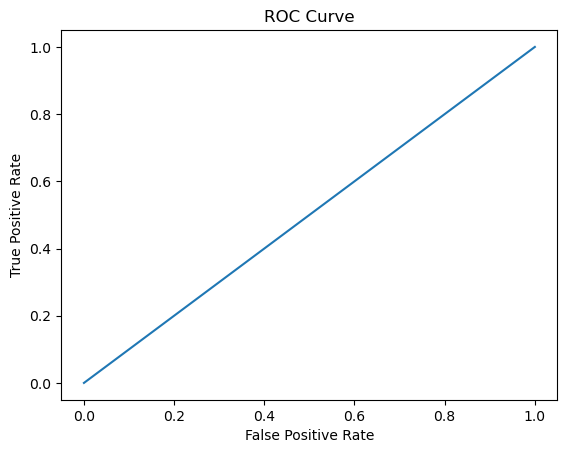

In [136]:
# calculate false positive rate and true positive rate of model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate AUC (area under the curve)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC: ", roc_auc)

# plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

You are likely to see that the model does not tend to predict that individuals survived the voyage. Let's see if we can determine why.

7. Look at the average age of survivors vs. those that did not survive the voyage. What do you find?

In [137]:
# calculate average age of survivors and non-survivors
avg_age_survived = titanic[titanic['Survived'] == 1]['Age'].mean()
avg_age_died = titanic[titanic['Survived'] == 0]['Age'].mean()

# print average age of survivors and non-survivors
print('Average age of survivors: ', avg_age_survived)
print('Average age of non-survivors: ', avg_age_died)

Average age of survivors:  28.343689655172415
Average age of non-survivors:  30.62617924528302


It seems that the average age of non-survivors is over two years older than the average age of the survivors!

8. Perhaps the actual age number is as important as whether a passenger was a child or an adult. Create a Boolean column that indicates whether a passenger was a child or an adult. Pick a cutoff age and if they were less than this age, label as a child. We'll see later on how we can make choosing the age part of our model building pipeline, but for now, choose an age or do some calculations to pick an age that you think might do well.

In [138]:
# specify child cutoff age
child_cutoff_age = 18

# use np.where to create a boolean Child column
titanic['Child'] = np.where(titanic['Age'] < child_cutoff_age, True, False)

9. When imputing the missing values, you'll need to change the strategy from mean to most_frequent. Impute the missing values, then fit the model using this new variable, generate predictions, and view the confusion matrix. How did your model do?

In [139]:
# specify target and predictor(s)
predictors = ['Child']
target = 'Survived'

X = titanic[predictors].astype(int)
y = titanic[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # do not want to refit to the test data, use train data

# initializing our logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# print confusion matrix for model
print(confusion_matrix(y_test, y_pred))

[[143  22]
 [ 84  19]]


Well, it seems that the model does slightly better, but a lot of false positives still.

Other common metrics for classification include accuracy, precision, and recall. For more information, see https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall. These metrics can be viewed using the classification_report function.

10. Generate a classification report for your model.

In [140]:
# print confusion matrix for model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73       165
           1       0.46      0.18      0.26       103

    accuracy                           0.60       268
   macro avg       0.55      0.53      0.50       268
weighted avg       0.57      0.60      0.55       268



Another important variable is the Sex variable.

11. Create a DataFrame, X, which contains one column, Sex, and a Series, y, which contains the target variable. Perform a 70/30 train/test split, stratifying by the target variable. Make sure that you set a random_state during this split.

In [141]:
# specify target and predictor(s)
predictors = ['Sex']
target = 'Survived'

X = titanic[predictors]
y = titanic[target]

# train, test, split titanic data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

If you inspect the Sex variable, you'll find that it is encoded as a string. We need to convert it to a numeric type so that our model can use it. We can do this using a OneHotEncoder.

12. Fit a OneHotEncoder to the training data and then transform both the training and test sets. Fit a model and evaluate the performance of this model.

In [142]:
from sklearn.preprocessing import OneHotEncoder

# one hot encoder breaking down our predictor variables

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# initializing our logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)
y_pred = logreg.predict(X_test_encoded)

# print model metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[138  27]
 [ 33  70]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.72      0.68      0.70       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



Notice how we have used different types of transformations, an imputer for the age-related variables and a OneHotEncoder for the Sex variable. When we need to use multiple types of transformations, a ColumnTransformer is useful.

In the next part, we'll fit a model using both the Sex column and our column indicating whether the passenger was a child.

13. Create a DataFrame, X, which contains two columns, Sex and the child indicator column, and a Series, y, which contains the target variable. Perform a 70/30 train/test split, stratifying by the target variable. Make sure that you set a random_state during this split. Then create a ColumnTransformer which will apply a SimpleImputer to the child column and a OneHotEncoder to the Sex column. Fit it on the training data and then transform the test data. Then fit a model on this and see how well it does.

In [143]:
from sklearn.compose import ColumnTransformer

# transforming Child column to a digestible type (int) for the SimpleImputer later on
titanic['Child'] = titanic['Child'].astype(int)

# specify target and predictor(s)
predictors = ['Sex', 'Child']
target = 'Survived'

X = titanic[predictors]
y = titanic[target]

# train, test, split titanic data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

In [144]:
# initalize column transformer
ct = ColumnTransformer(
    [('child_preprocess', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), ['Child']),
     ('sex_preprocess', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Sex'])]
)

# now apply transformer to X_train and X_test
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

# initializing our logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)
y_pred = logreg.predict(X_test_encoded)

# print model metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[138  27]
 [ 33  70]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.72      0.68      0.70       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



Finally, let's see how we can do all of this in a slightly more compact manner. We can use a Pipeline which allows us to specify preprocessing steps (like the ColumnTransformer we used earlier) as well as the model we want to fit.

14. Create a Pipeline which contains the ColumnTransformer and the LogisticRegression model.

In [ ]:
from sklearn.pipeline import Pipeline

# initialize pipeline preprocessing steps
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
logreg = LogisticRegression()

# FIGURE OUT HOW TO USE COLUMN TRANSFORMER HERE

# specify steps and create the pipeline
steps = [('imputer', imputer),
         ('encoder', encoder),
         ('logreg', logreg)]

pipeline = Pipeline(steps)

# fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# make predictions on the test set
y_pred = pipeline.predict(X_test)

# print model metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[138  27]
 [ 33  70]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.72      0.68      0.70       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



### Trying to make a better model on my own

In [146]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [157]:
# specify target and predictor(s)
predictors = ['Sex', 'Child', 'Pclass', 'Cabin']
target = 'Survived'

X = titanic[predictors]
y = titanic[target]

# train, test, split titanic data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

In [158]:
# initialize pipeline preprocessing steps
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
logreg = LogisticRegression()

# specify steps and create the pipeline
steps = [('imputer', imputer),
         ('encoder', encoder),
         ('logreg', logreg)]

pipeline = Pipeline(steps)

# fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# make predictions on the test set
y_pred = pipeline.predict(X_test)

# print model metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[138  27]
 [ 30  73]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       165
           1       0.73      0.71      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

